# Import libraries, set paths, download and unpack data

In [1]:
import urllib, zipfile, os
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_path = 'C:/Users/mneskovic/Desktop/project/'
os.chdir(project_path) # just in case
data_url = 'https://data.london.gov.uk/download/smartmeter-energy-use-data-in-london-households/3527bf39-d93e-4071-8451-df2ade1ea4f2/Power-Networks-LCL-June2015(withAcornGps).zip'
dataset_zip = 'SmartMeter_Energy_Consumption_Data_in_London_Households.zip'
dataset_name = 'Power-Networks-LCL-June2015(withAcornGps)v2.csv'
dataset_path = 'data/'+dataset_name

In [3]:
if os.path.exists(dataset_path):
    print('Data already downloaded and unpacked.')
else:
    os.chdir(project_path+'data/')
    urllib.request.urlretrieve(data_url, dataset_zip)
    print('Data downloaded.')
    with zipfile.ZipFile(dataset_zip, 'r') as z:
        z.extractall()
    print('Data unpacked.')
    os.chdir(project_path)

Data already downloaded and unpacked.


# Dataset description

Energy consumption readings for a sample of 5,567 London Households that took part in the UK Power Networks led Low Carbon London project between November 2011 and February 2014.

Readings were taken at half hourly intervals. Households have been allocated to a CACI Acorn group (2010).  The customers in the trial were recruited as a balanced sample representative of the Greater London population.

The dataset contains energy consumption, in kWh (per half hour), unique household identifier, date and time, and CACI Acorn group. The CSV file is around 10GB when unzipped and contains around 167million rows.

Within the data set are two groups of customers. The first is a sub-group, of approximately 1100 customers, who were subjected to Dynamic Time of Use (dToU) energy prices throughout the 2013 calendar year period.  The tariff prices were given a day ahead via the Smart Meter IHD (In Home Display) or text message to mobile phone. Customers were issued High (67.20p/kWh), Low (3.99p/kWh) or normal (11.76p/kWh) price signals and the times of day these applied. The dates/times and the price signal schedule is availaible as part of this dataset. All non-Time of Use customers were on a flat rate tariff of 14.228pence/kWh.

The signals given were designed to be representative of the types of signal that may be used in the future to manage both high renewable generation (supply following) operation and also test the potential to use high price signals to reduce stress on local distribution grids during periods of stress.

The remaining sample of approximately 4500 customers energy consumption readings were not subject to the dToU tariff.

In [6]:
headers = ['LCLid', 'stdorToU', 'DateTime', 'KWH_hh', 'Acorn', 'Acorn_grouped']
dtypes = {'LCLid': 'str',
          'stdorToU': 'str',
          'DateTime': 'str',
          'KWH_hh': 'float',
          'Acorn': 'str',
          'Acorn_grouped': 'str'}
parse_dates = ['DateTime']

data = pd.read_csv(dataset_path, header=None, names=headers, dtype=dtypes, parse_dates=parse_dates, 
                   skiprows=1, na_values=['Null'], keep_default_na=False)

In [5]:
data.shape

(167932474, 6)

In [6]:
data.head()

,LCLid,stdorToU,DateTime,KWH_hh,Acorn,Acorn_grouped
0,MAC000002,Std,2012-10-12 00:30:00,0.0,ACORN-A,Affluent
1,MAC000002,Std,2012-10-12 01:00:00,0.0,ACORN-A,Affluent
2,MAC000002,Std,2012-10-12 01:30:00,0.0,ACORN-A,Affluent
3,MAC000002,Std,2012-10-12 02:00:00,0.0,ACORN-A,Affluent
4,MAC000002,Std,2012-10-12 02:30:00,0.0,ACORN-A,Affluent


In [7]:
data.isna().sum(axis=0)

LCLid               0
stdorToU            0
DateTime            0
KWH_hh           5560
Acorn               0
Acorn_grouped       0
dtype: int64

Dodatno definisanje NULL vrijednosti podeseno prilikom ucitavanja fajla

In [ ]:
# data['KWH_hh'] = data['KWH_hh'].astype(float)
# 'Null' as na
# data[data['KWH_hh']=='Null']#.shape[0]
# remove rows with 'Null'
# data = data[data['KWH_hh'] != 'Null']
# data['KWH_hh'] = data['KWH_hh'].astype(float)

In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(167926914, 6)

In [10]:
# small number of mesures for some households
data['LCLid'].value_counts().nsmallest(10)
# ? remove nsmallest(5)

MAC005565      44
MAC001300     360
MAC002110     478
MAC001278     506
MAC001957     604
MAC003346    4159
MAC001653    4275
MAC003353    5066
MAC003554    5164
MAC003559    5812
Name: LCLid, dtype: int64

In [45]:
data.groupby(['LCLid'])['DateTime'].apply(lambda x: x.max() - x.min()).nsmallest(10)

LCLid
MAC005565     0 days 21:30:00
MAC001300     8 days 11:00:00
MAC002110     9 days 22:00:00
MAC001278    10 days 12:00:00
MAC001957    14 days 13:00:00
MAC003346    86 days 13:30:00
MAC003353   105 days 13:00:00
MAC003554   107 days 11:30:00
MAC003559   120 days 23:30:00
MAC003935   123 days 23:00:00
Name: DateTime, dtype: timedelta64[ns]

In [47]:
# check if some hosehold were in both types of pricing
data.groupby(['LCLid'])['stdorToU'].nunique().nlargest(1)

LCLid
MAC000002    1
Name: stdorToU, dtype: int64

In [46]:
# number of households per pricing type
data.groupby(['stdorToU'])['LCLid'].nunique()

stdorToU
Std    4438
ToU    1123
Name: LCLid, dtype: int64

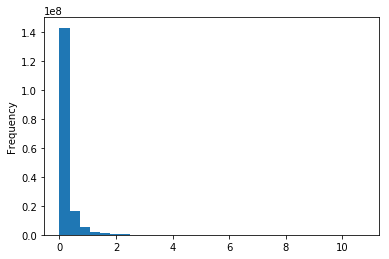

In [55]:
data['KWH_hh'].plot.hist(bins=30)

## Acorn User Guide
There is more ACORN types then in user guide - https://acorn.caci.co.uk/downloads/Acorn-User-guide.pdf

In [47]:
data.Acorn.unique()
# ACORN- == UNKNOWN ACORN == ACORN-U ?
# ACORN-U does not exist in user guide

array(['ACORN-A', 'ACORN-P', 'ACORN-E', 'ACORN-Q', 'ACORN-H', 'ACORN-L',
       'ACORN-N', 'ACORN-K', 'ACORN-J', 'ACORN-U', 'ACORN-D', 'ACORN-F',
       'ACORN-G', 'ACORN-C', 'ACORN-M', 'ACORN-O', 'ACORN-I', 'ACORN-B',
       'ACORN-'], dtype=object)

In [58]:
data.Acorn_grouped.unique()

array(['Affluent', 'Adversity', 'Comfortable', 'ACORN-U', 'ACORN-'],
      dtype=object)

In [67]:
print(data.loc[data.Acorn=='ACORN-'].LCLid.unique(), '\n',
      data.loc[data.Acorn_grouped=='ACORN-'].LCLid.unique(), '\n',
      data.loc[data.Acorn=='ACORN-U'].LCLid.unique(), '\n',
      data.loc[data.Acorn_grouped=='ACORN-U'].LCLid.unique())
# ACORN- & ACORN-U for the same households

['MAC001074' 'MAC005492'] 
 ['MAC001074' 'MAC005492'] 
 ['MAC000023' 'MAC000099' 'MAC001256' 'MAC001348' 'MAC001600' 'MAC001795'
 'MAC001997' 'MAC002056' 'MAC002087' 'MAC002152' 'MAC002485' 'MAC002647'
 'MAC002720' 'MAC003078' 'MAC003163' 'MAC003218' 'MAC003317' 'MAC003328'
 'MAC003407' 'MAC003619' 'MAC003780' 'MAC003860' 'MAC003884' 'MAC003992'
 'MAC004010' 'MAC004067' 'MAC004069' 'MAC004142' 'MAC004215' 'MAC004515'
 'MAC004570' 'MAC004587' 'MAC004649' 'MAC004672' 'MAC004788' 'MAC004828'
 'MAC005036' 'MAC005363' 'MAC005424' 'MAC001147' 'MAC001704' 'MAC001706'
 'MAC001851' 'MAC002774' 'MAC003652' 'MAC003916' 'MAC003977' 'MAC004323'
 'MAC004467'] 
 ['MAC000023' 'MAC000099' 'MAC001256' 'MAC001348' 'MAC001600' 'MAC001795'
 'MAC001997' 'MAC002056' 'MAC002087' 'MAC002152' 'MAC002485' 'MAC002647'
 'MAC002720' 'MAC003078' 'MAC003163' 'MAC003218' 'MAC003317' 'MAC003328'
 'MAC003407' 'MAC003619' 'MAC003780' 'MAC003860' 'MAC003884' 'MAC003992'
 'MAC004010' 'MAC004067' 'MAC004069' 'MAC004142' 'MA

In [49]:
# one household can have only one of stdorToU, ACRON and ACORN group
print(data.LCLid.nunique())
print(data[['LCLid', 'stdorToU', 'Acorn', 'Acorn_grouped']].drop_duplicates().shape[0])

5561
5561


In [9]:
pricing_and_acron_types = data[['LCLid', 'stdorToU', 'Acorn']].drop_duplicates()

In [15]:
# separate pricing type and ACRON types to another file and remove exported columns
pricing_and_acron_types = data[['LCLid', 'stdorToU', 'Acorn']].drop_duplicates()

pricing_and_acron_types.to_csv('data/pricing_and_acron_types.csv', index=False)

with open('data/pricing_and_acron_types.pickle', 'wb') as handle:
    pkl.dump(pricing_and_acron_types, handle)

data.drop(['stdorToU', 'Acorn', 'Acorn_grouped'], axis=1, inplace=True)

del(pricing_and_acron_types)

In [13]:
print(data.head(48))

        LCLid            DateTime  KWH_hh
0   MAC000002 2012-10-12 00:30:00   0.000
1   MAC000002 2012-10-12 01:00:00   0.000
2   MAC000002 2012-10-12 01:30:00   0.000
3   MAC000002 2012-10-12 02:00:00   0.000
4   MAC000002 2012-10-12 02:30:00   0.000
5   MAC000002 2012-10-12 03:00:00   0.000
6   MAC000002 2012-10-12 03:30:00   0.000
7   MAC000002 2012-10-12 04:00:00   0.000
8   MAC000002 2012-10-12 04:30:00   0.000
9   MAC000002 2012-10-12 05:00:00   0.000
10  MAC000002 2012-10-12 05:30:00   0.000
11  MAC000002 2012-10-12 06:00:00   0.000
12  MAC000002 2012-10-12 06:30:00   0.000
13  MAC000002 2012-10-12 07:00:00   0.000
14  MAC000002 2012-10-12 07:30:00   0.000
15  MAC000002 2012-10-12 08:00:00   0.000
16  MAC000002 2012-10-12 08:30:00   0.000
17  MAC000002 2012-10-12 09:00:00   0.000
18  MAC000002 2012-10-12 09:30:00   0.000
19  MAC000002 2012-10-12 10:00:00   0.000
20  MAC000002 2012-10-12 10:30:00   0.000
21  MAC000002 2012-10-12 11:30:00   0.143
22  MAC000002 2012-10-12 12:00:00 

In [24]:
data.sort_values(by=['LCLid', 'DateTime'], inplace=True)
# already looks sorted

In [1]:
#data.to_csv('data/consumption_per_datetime.csv', index=False)
#import pandas as pd
#dtypes = {'LCLid': 'str', 'DateTime': 'str', 'KWH_hh': 'float'}
#parse_dates = ['Date']
#consumption_per_datetime = pd.read_csv('data/consumption_per_datetime.csv', dtype=dtypes, parse_dates=parse_dates)

In [15]:
with open('data/consumption_per_datetime.pickle', 'wb') as handle:
    pkl.dump(data, handle)

## Aggregate per part of the day

Parts of the day: night 00:00-05:30, morning 06:00-11:30, midday 12:00-17:30, evening 18:00-23:30

Average Daily Consumption in domestic - Chapter 3 Domestic Data Tables, sheet 3.11 - https://webarchive.nationalarchives.gov.uk/20150503104649/https://www.gov.uk/government/statistics/energy-consumption-in-the-uk

In [2]:
with open('data/consumption_per_datetime.pickle', 'rb') as handle:
    data = pkl.load(handle)

In [3]:
data.set_index('DateTime', inplace=True)

In [4]:
overall_agg = \
    data.groupby(['LCLid'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum', 'count', lambda x: (x.index.max() - x.index.min()).days]) \
    .rename(columns={'min':'overall_min', 'max':'overall_max', 'median':'overall_med', 'mean':'overall_mean', 'std':'overall_std', 'var':'overall_var', 'sum':'overall_sum', '<lambda>':'duration_in_days'})

night_agg = \
    data.between_time('00:00:00', '05:30:00') \
    .groupby(['LCLid'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
    .rename(columns={'min':'night_min', 'max':'night_max', 'median':'night_med', 'mean':'night_mean', 'std':'night_std', 'var':'night_var', 'sum':'night_sum'})

morning_agg = \
    data.between_time('06:00:00', '11:30:00') \
    .groupby(['LCLid'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
    .rename(columns={'min':'morning_min', 'max':'morning_max', 'median':'morning_med', 'mean':'morning_mean', 'std':'morning_std', 'var':'morning_var', 'sum':'morning_sum'})

midday_agg = \
    data.between_time('12:00:00', '17:30:00') \
    .groupby(['LCLid'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
    .rename(columns={'min':'midday_min', 'max':'midday_max', 'median':'midday_med', 'mean':'midday_mean', 'std':'midday_std', 'var':'midday_var', 'sum':'midday_sum'})

evening_agg = \
    data.between_time('18:00:00', '23:30:00') \
    .groupby(['LCLid'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
    .rename(columns={'min':'evening_min', 'max':'evening_max', 'median':'evening_med', 'mean':'evening_mean', 'std':'evening_std', 'var':'evening_var', 'sum':'evening_sum'})


## Aggregate per weekday

In [5]:
data.reset_index(inplace=True)

In [6]:
data['weekday'] = data.DateTime.dt.weekday # 0 - Monday ; 6 - Sunday

In [7]:
weekday_agg = \
data.groupby(['LCLid', 'weekday'])['KWH_hh'] \
.agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
.reset_index() \
.melt(id_vars=['LCLid', 'weekday'], value_vars=['min', 'max', 'median', 'mean', 'std', 'var', 'sum'])

weekday_agg['weekday_agg'] = weekday_agg['weekday'].map(str) + '_' + weekday_agg['variable']
weekday_agg.drop(['weekday', 'variable'], axis=1, inplace=True)

weekday_agg = weekday_agg.pivot_table(index=['LCLid'], columns=['weekday_agg'], values=['value'])
weekday_agg.columns = weekday_agg.columns.droplevel()

In [8]:
data.drop('weekday', axis=1, inplace=True)

## Aggregate per month and week

In [9]:
data['week'] = data.DateTime.dt.week
data['month'] = data.DateTime.dt.month
data['year'] = data.DateTime.dt.year

In [10]:
by_week = data.groupby(['LCLid', 'year', 'week'])['KWH_hh'] \
.agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
.reset_index() \
.melt(id_vars=['LCLid', 'year', 'week'], value_vars=['min', 'max', 'median', 'mean', 'std', 'var', 'sum'])

by_week['week_year'] = (by_week['year'] * 100 + by_week['week']).map(str) + '_' + 'w'  + '_' + by_week['variable']
by_week.drop(['year', 'week', 'variable'], axis=1, inplace=True)

by_week = by_week.pivot_table(index=['LCLid'], columns=['week_year'], values=['value'])
by_week.columns = by_week.columns.droplevel()

In [15]:
by_month = data.groupby(['LCLid', 'year', 'month'])['KWH_hh'] \
.agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
.reset_index() \
.melt(id_vars=['LCLid', 'year', 'month'], value_vars=['min', 'max', 'median', 'mean', 'std', 'var', 'sum'])

by_month['month_year'] = (by_month['year'] * 100 + by_month['month']).map(str) + '_' + 'm'+ '_' + by_month['variable']
by_month.drop(['year', 'month', 'variable'], axis=1, inplace=True)

by_month = by_month.pivot_table(index=['LCLid'], columns=['month_year'], values=['value'])
by_month.columns = by_month.columns.droplevel()

In [17]:
data.drop(['week', 'year'], axis=1, inplace=True)

## Aggregate per season
proljece (21.03.-21.06.), 
ljeto (21.06.-23.09.), 
jesen (23.09.-21.12.), 
zima (21.12.-21.03.)

In [18]:
data['month_day'] = data.month * 100 + data.DateTime.dt.day
data.drop('month', axis=1, inplace=True)
data['season'] = ''

In [19]:
data.loc[data['month_day'].between(101, 320), 'season'] = 'winter'
data.loc[data['month_day'].between(321, 620), 'season'] = 'spring'
data.loc[data['month_day'].between(621, 922), 'season'] = 'summer'
data.loc[data['month_day'].between(923, 1220), 'season'] = 'autumn'
data.loc[data['month_day'].between(1221, 1231), 'season'] = 'winter'

In [20]:
season_agg = data.groupby(['LCLid', 'season'])['KWH_hh'] \
.agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
.reset_index() \
.melt(id_vars=['LCLid', 'season'], value_vars=['min', 'max', 'median', 'mean', 'std', 'var', 'sum'])

season_agg['season_var'] = season_agg['season'] + '_' + season_agg['variable']
season_agg.drop(['season', 'variable'], axis=1, inplace=True)

season_agg = season_agg.pivot_table(index=['LCLid'], columns=['season_var'], values=['value'])
season_agg.columns = season_agg.columns.droplevel()

**data_agg contains aggregations per part of the day, by month and week, and by season, all per household**

In [21]:
data_agg = \
overall_agg \
.join(night_agg, on='LCLid', how='left') \
.join(morning_agg, on='LCLid', how='left') \
.join(midday_agg, on='LCLid', how='left') \
.join(evening_agg, on='LCLid', how='left') \
.join(weekday_agg, on='LCLid', how='left') \
.join(by_week, on='LCLid', how='left') \
.join(by_month, on='LCLid', how='left') \
.join(season_agg, on='LCLid', how='left')

In [22]:
with open('data/data_agg.pickle', 'wb') as handle:
    pkl.dump(data_agg, handle)

In [23]:
data_agg.to_csv('data/data_agg.csv')

In [24]:
data.drop(columns=['month_day', 'season'], inplace=True)

In [25]:
del([by_month, by_week, data_agg, evening_agg, midday_agg, morning_agg, night_agg, overall_agg, season_agg, weekday_agg])

## Aggregate per day for each household.

In [43]:
data['Date'] = data.DateTime.dt.date
data.drop(['DateTime'], axis=1, inplace=True)

In [44]:
data_agg_daily = \
    data.groupby(['LCLid', 'Date'])['KWH_hh'] \
    .agg(['min', 'max', 'median', 'mean', 'std', 'var', 'sum']) \
    .reset_index() \
    .melt(id_vars=['LCLid', 'Date'], value_vars=['min', 'max', 'median', 'mean', 'std', 'var', 'sum'])

In [45]:
data_agg_daily['date_agg'] = data_agg_daily['Date'].map(str) + '_' + data_agg_daily['variable']

data_agg_daily.drop(['Date', 'variable'], axis=1, inplace=True)

data_agg_daily = data_agg_daily.pivot_table(index=['LCLid'], columns=['date_agg'], values=['value'])

data_agg_daily.columns = data_agg_daily.columns.droplevel()

In [49]:
with open('data/data_agg_daily.pickle', 'wb') as handle:
    pkl.dump(data_agg_daily, handle)

In [50]:
data_agg_daily.to_csv('data/data_agg_daily.csv')

## Adding acorn details

Details on the acorn groups and their profile of the people in the group. The first three columns are the attributes studied, the ACORN-X is the index of the attribute. At a national scale, the index is 100 if for one column the value is 150 it means that there are 1.5 times more people with this attribute in the ACORN group than at the national scale.

**NAPOMENA** - ACORN-R ne postoji ni u datasetu ni u dodatnim informacijama o ovim grupama

In [48]:
acorn_details_path = 'data/acorn_details.csv'
headers = ['MAIN_CATEGORIES','CATEGORIES', 'REFERENCE',
           'ACORN-A', 'ACORN-B', 'ACORN-C', 'ACORN-D', 'ACORN-E', 'ACORN-F',
           'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J', 'ACORN-K', 'ACORN-L',
           'ACORN-M', 'ACORN-N', 'ACORN-O', 'ACORN-P', 'ACORN-Q' ]
acorn_details = pd.read_csv(acorn_details_path, skiprows=1, header=None, names=headers, encoding='cp1252')

In [174]:
acorn_details[acorn_details.CATEGORIES=='Age']

,MAIN_CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
5,POPULATION,Age,Age 50-64,124.0,121.0,120.0,72.0,82.0,126.0,109.0,107.0,112.0,90.0,41.0,95.0,96.0,103.0,89.0,78.0,89.0
6,POPULATION,Age,Aged 65-74,125.0,120.0,152.0,55.0,61.0,144.0,108.0,104.0,182.0,72.0,29.0,91.0,93.0,125.0,73.0,59.0,76.0
7,POPULATION,Age,Aged 75 plus,112.0,103.0,157.0,49.0,57.0,117.0,98.0,96.0,220.0,66.0,32.0,87.0,96.0,152.0,72.0,56.0,76.0


In [215]:
acorns = [
('Affluent Achievers', 'ACORN-A', 'Lavish Lifestyles'),
('Affluent Achievers', 'ACORN-B', 'Executive Wealth'),
('Affluent Achievers', 'ACORN-C', 'Mature Money'),
('Rising Prosperity' , 'ACORN-D', 'City Sophisticates'),
('Rising Prosperity' , 'ACORN-E', 'Career Climbers'),
('Comfortable Communities', 'ACORN-F', 'Countryside Communities'),
('Comfortable Communities', 'ACORN-G', 'Successful Suburb'),
('Comfortable Communities', 'ACORN-H', 'Steady Neighbourhoods'),
('Comfortable Communities', 'ACORN-I', 'Comfortable Seniors'),
('Comfortable Communities', 'ACORN-J', 'Starting Out'),
('Financially Stretched', 'ACORN-K', 'Student Life'),
('Financially Stretched', 'ACORN-L', 'Modest Means'),
('Financially Stretched', 'ACORN-M', 'Striving Families'),
('Financially Stretched', 'ACORN-N', 'Poorer Pensioner'),
('Urban Adversity', 'ACORN-O', 'Young Hardship'),
('Urban Adversity', 'ACORN-P', 'Struggling Estates'),
('Urban Adversity', 'ACORN-Q', 'Difficult Circumstances')
# ,('Not Private Households', 'ACORN-R', 'Not Private Households')
]
colnames = ['acorn_group', 'acorn_type', 'acorn_desc']
acorn_categories = pd.DataFrame(acorns, columns=colnames).set_index('acorn_type')

In [79]:
acorn_details.MAIN_CATEGORIES.unique()

array(['POPULATION', 'HOUSING', 'FAMILY', 'ECONOMY', 'EDUCATION',
       'HEALTH', 'TRANSPORT', 'MARKETING CHANNELS', 'FINANCE', 'DIGITAL',
       'SHOPPING', 'CONTACT', 'ENVIRONMENT', 'COMMUNITY SAFETY',
       'LEISURE TIME'], dtype=object)

In [139]:
# based on eye test, selecting following
# CATEGORIES: Age, House Type, House Tenure, House Size, House Value, Structure, Children in household, Household Size,
#             Internet Access: Frequency, Internet Access: Usage in Last Week
# ENVIROMENT - All categories
# 'POPULATION', 'HOUSING', 'FAMILY', 'DIGITAL', 'ENVIRONMENT'
print(acorn_details.loc[acorn_details['MAIN_CATEGORIES']=='ENVIRONMENT', ['CATEGORIES', 'REFERENCE']].drop_duplicates())

               CATEGORIES                                          REFERENCE
700  Environmental Groups                      Member of Environmental Group
701                Action  Rarely Leave TV or PC on standby for long peri...
702                Action   Rarely keep the tap running while brushing teeth
703                Action  Rarely leave the heating on when out for a few...
704                Action  Decide not to buy something because it has too...
705                Action                Take own shopping bag when shopping
706                Action  Re-use items like empty bottles, tubs, jars, e...
707                Action  Rarely leave the mobile phone charger in the s...
708                Action       Recycle items rather than throwing them away
709                Action  Make an effort to cut down on the use of gas/e...
710                Action  Make an effort to cut down on water usage at home
711              Attitude  There is too much concern with the environment...

In [217]:
# kreiram prazan dataframe odgovarajuce strukture za upisivanje izabranih vrijednosti ACORN tipova
selected_categories = ['Age','House Type','House Tenure','House Size','House Value','Structure','Children in household','Household Size','Internet Access: Frequency','Internet Access: Usage in Last Week']

acorn_selected = acorn_details[acorn_details['CATEGORIES'].isin(selected_categories)] \
.drop(['MAIN_CATEGORIES', 'REFERENCE'], axis=1) \
.drop_duplicates(['CATEGORIES']) \
.set_index(['CATEGORIES'])

acorn_selected[:] = ''

acorn_columns = acorn_selected.columns.to_list()

acorn_selected.reset_index(inplace=True)

In [218]:
for categorie in selected_categories:
    for col in acorn_columns:
        acorn_type_max = acorn_details[acorn_details.CATEGORIES==categorie][col].max()
        reference_level = acorn_details.loc[(acorn_details.CATEGORIES==categorie) & (acorn_details[col]==acorn_type_max), 'REFERENCE'].values[0]
        acorn_selected.loc[acorn_selected['CATEGORIES']==categorie, col] = reference_level

In [219]:
acorn_selected = acorn_selected \
.melt(id_vars=['CATEGORIES'], value_vars=acorn_columns) \
.pivot(index='variable', columns='CATEGORIES', values='value')

In [213]:
environment = acorn_details.loc[acorn_details['MAIN_CATEGORIES']=='ENVIRONMENT', ] \
.drop(['MAIN_CATEGORIES', 'CATEGORIES'], axis=1) \
.melt(id_vars=['REFERENCE'], value_vars=acorn_columns) \
.pivot(index='variable', columns='REFERENCE', values='value')

In [225]:
acorn_data = acorn_categories \
.join(acorn_selected, how='inner') \
.join(environment, how='inner')

In [226]:
with open('data/acorn_data.pickle', 'wb') as handle:
    pkl.dump(acorn_data, handle)

In [237]:
del(acorn_categories, acorn_columns, acorn_selected, acorn_type_max, acorns, categorie, col, colnames, environment, headers, reference_level, selected_categories)

## Kratak pregled

Fajlovi koji su kreirani do sada i sadrzaj:
- **consumption_per_datetime** : pocetni skup sa potrosnjom po domacinstvu po intervalu od pola sata
- **data_agg**                 : potrosnja po domacinstvu - osnovne agregacije, po dijelu dana, po mjesecu, po sedmici, po godisnjem dobu
- **data_daily_agg**           : potrosnja po domacinstvu po danu
- **pricing_acron**            : nacinu naplate i acron tip za svako domacinstvo
- **acron_data**               : ACRON groupa, tip, opis, sa dodatnim varijablama od moguceg znacaja

Slijedeci koraci:
- provjeriti sta je sa onima koji imaju malo mjerenja
- provjeriti sta je sa ACORN-U
- provjeriti da li postoji razlika u prosjecnoj potrosnji izmedju ACRON grupama i tipovima, prema mjesecu, sedmici, dijelu dana, radnom danu
- provjeriti kako se ponasaju domacinstva kroz vrijeme prema dnevnoj potrosnji
- kreirati zavrsnu tabelu za klasterovanje

### Domacinstva koja imaju mali broj mjera

In [27]:
with open('data/consumption_per_datetime.pickle', 'rb') as handle:
    cons_per_dt = pkl.load(handle)

In [4]:
cons_per_dt.head()

,LCLid,DateTime,KWH_hh
0,MAC000002,2012-10-12 00:30:00,0.0
1,MAC000002,2012-10-12 01:00:00,0.0
2,MAC000002,2012-10-12 01:30:00,0.0
3,MAC000002,2012-10-12 02:00:00,0.0
4,MAC000002,2012-10-12 02:30:00,0.0


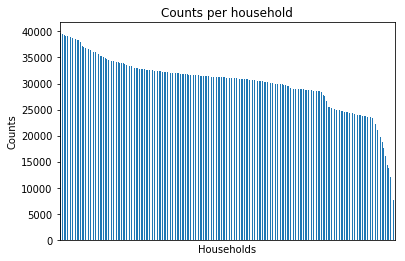

In [4]:
cons_per_dt['LCLid'].value_counts().plot(kind='bar')
plt.xticks([])
plt.title('Counts per household')
plt.xlabel('Households')
plt.ylabel('Counts')
plt.show()

- 173 domacinstva nemaju mjerenja za punu godinu, sto je samo 3.11% od uzorka
- izbacicu ova domacinstva, jer je mali broj slucajeva, a obezbedjuje mi da su sve izvedene varijable NOT NULL

In [5]:
sum(cons_per_dt.groupby(['LCLid'])['DateTime'].apply(lambda x: x.max() - x.min()) < pd.to_timedelta('360 days'))

173

In [45]:
173 / 5561 * 100

3.110951267757598

In [28]:
# removing households that are monitored under a year
households_days_under_360 = cons_per_dt.groupby(['LCLid'])['DateTime'].apply(lambda x: x.max() - x.min()) < pd.to_timedelta('360 days')
excluded_households = list(households_days_under_360[households_days_under_360.values==True].index)

cons_per_dt = cons_per_dt.loc[~cons_per_dt['LCLid'].isin(excluded_households), ]

### Provjera domacinstava za ACORN-U i ACORN-

In [29]:
with open('data/pricing_and_acron_types.pickle', 'rb') as handle:
    pricing_and_acron_types = pkl.load(handle)

In [8]:
pricing_and_acron_types.head()

,LCLid,stdorToU,Acorn
0,MAC000002,Std,ACORN-A
24158,MAC000003,Std,ACORN-P
59627,MAC000004,Std,ACORN-E
91304,MAC000006,Std,ACORN-Q
127765,MAC000007,Std,ACORN-H


In [9]:
# postoji 51 domacinstvo sa nepoznatim ACRON tipovima
pricing_and_acron_types[pricing_and_acron_types.Acorn.isin(['ACORN-U', 'ACORN-'])].shape[0]

51

In [11]:
# od prethodnih 51, 47 se nalazi u cons_per_dt podacima, odnosno 0.87% uzorka nema ove karakteristike
print(len(list(set(pricing_and_acron_types[pricing_and_acron_types.Acorn.isin(['ACORN-U', 'ACORN-'])].LCLid.unique()) \
         .intersection(set(cons_per_dt.LCLid.unique())))) )
print(47 / cons_per_dt.LCLid.nunique() * 100)

47
0.8723088344469191


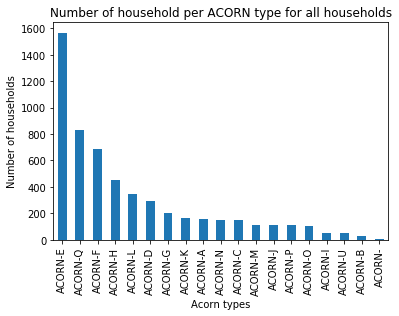

In [49]:
pricing_and_acron_types['Acorn'].value_counts().plot(kind='bar')
plt.title('Number of household per ACORN type for all households')
plt.xlabel('Acorn types')
plt.ylabel('Number of households')
plt.show()

In [30]:
with open('data/acorn_data.pickle', 'rb') as handle:
    acorn_data = pkl.load(handle)

In [31]:
acorn_data.reset_index(inplace=True)

In [32]:
pricing_and_acron = pd.merge(pricing_and_acron_types, acorn_data[['acorn_type', 'acorn_group']], left_on='Acorn', right_on='acorn_type', how='inner')

In [33]:
pricing_and_acron.drop('Acorn', axis=1, inplace=True)
pricing_and_acron.head()

,LCLid,stdorToU,acorn_type,acorn_group
0,MAC000002,Std,ACORN-A,Affluent Achievers
1,MAC000030,Std,ACORN-A,Affluent Achievers
2,MAC000040,Std,ACORN-A,Affluent Achievers
3,MAC000103,Std,ACORN-A,Affluent Achievers
4,MAC000110,Std,ACORN-A,Affluent Achievers


In [34]:
pricing_and_acron.shape # izbaceno 51 domacinstvo sa nepoznatim ACRON

(5510, 4)

In [35]:
# excluded_households nastaje u dijelu - Domacinstva koja imaju mali broj mjera
# izbacijumo domacinstava koji imaju ispod godinu dana mjerenja
pricing_and_acron = pricing_and_acron.loc[~pricing_and_acron['LCLid'].isin(excluded_households), ]

pricing_and_acron.shape

(5341, 4)

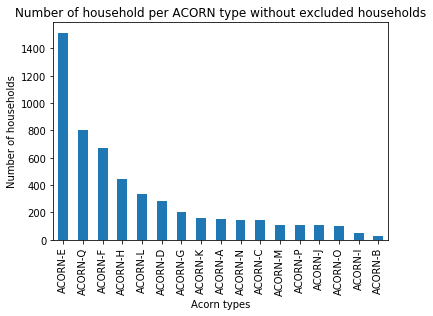

In [18]:
pricing_and_acron['acorn_type'].value_counts().plot(kind='bar')
plt.title('Number of household per ACORN type without excluded households')
plt.xlabel('Acorn types')
plt.ylabel('Number of households')
plt.show()

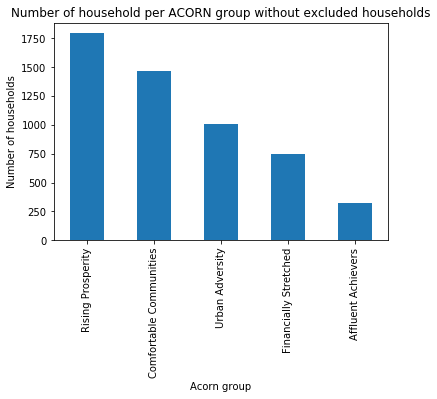

In [19]:
pricing_and_acron['acorn_group'].value_counts().plot(kind='bar')
plt.title('Number of household per ACORN group without excluded households')
plt.xlabel('Acorn group')
plt.ylabel('Number of households')
plt.show()

#### U daljem dijelu analize necu koristiti domacinstva koja nemaju ACORN klasifikaciju

In [36]:
del(cons_per_dt)

In [37]:
with open('data/data_agg.pickle', 'rb') as handle:
    data_agg = pkl.load(handle)

In [38]:
data_agg.reset_index(inplace=True)

In [39]:
data_agg.head()

,LCLid,overall_min,overall_max,overall_med,overall_mean,overall_std,overall_var,overall_sum,count,duration_in_days,...,summer_std,summer_sum,summer_var,winter_max,winter_mean,winter_median,winter_min,winter_std,winter_sum,winter_var
0,MAC000002,0.000,2.994,0.158,0.252562,0.247123,0.061070,6101.138001,24157,503.0,...,0.171816,854.232,0.029521,2.994,0.294401,0.191,0.065,0.299054,2248.632001,0.089434
1,MAC000003,0.007,3.921,0.166,0.397666,0.615261,0.378546,14104.433003,35468,738.0,...,0.299212,2307.060,0.089528,3.704,0.573881,0.171,0.007,0.820267,5195.915004,0.672839
2,MAC000004,0.000,1.065,0.000,0.035383,0.073146,0.005350,1120.788000,31676,660.0,...,0.067591,281.918,0.004569,1.065,0.038978,0.000,0.000,0.078442,297.752000,0.006153
3,MAC000005,0.010,1.979,0.041,0.095388,0.122195,0.014932,2911.808000,30526,636.0,...,0.088414,705.580,0.007817,1.860,0.116045,0.064,0.022,0.145055,886.468000,0.021041
4,MAC000006,0.000,0.801,0.048,0.059471,0.052552,0.002762,2168.325000,36460,759.0,...,0.044293,457.949,0.001962,0.774,0.064336,0.050,0.000,0.058434,647.610000,0.003415


In [40]:
data_joined = pricing_and_acron.set_index('LCLid').join(data_agg.set_index('LCLid'), how='inner')

In [41]:
data_joined.shape

(5341, 1146)

In [42]:
data_joined.head()

,stdorToU,acorn_type,acorn_group,overall_min,overall_max,overall_med,overall_mean,overall_std,overall_var,overall_sum,...,summer_std,summer_sum,summer_var,winter_max,winter_mean,winter_median,winter_min,winter_std,winter_sum,winter_var
LCLid,,,,,,,,,,,,,,,,,,,,,
MAC000002,Std,ACORN-A,Affluent Achievers,0.000,2.994,0.158,0.252562,0.247123,0.061070,6101.138001,...,0.171816,854.232000,0.029521,2.994,0.294401,0.191,0.065,0.299054,2248.632001,0.089434
MAC000030,Std,ACORN-A,Affluent Achievers,0.032,4.094,0.133,0.237495,0.297929,0.088761,9277.965001,...,0.204653,1499.543000,0.041883,4.094,0.288617,0.154,0.032,0.348517,3465.999000,0.121464
MAC000040,Std,ACORN-A,Affluent Achievers,0.020,5.172,0.434,0.555735,0.393963,0.155207,21690.353002,...,0.289259,4588.055001,0.083671,3.858,0.591656,0.466,0.180,0.429009,7105.787002,0.184048
MAC000103,Std,ACORN-A,Affluent Achievers,0.128,3.644,0.431,0.501228,0.330664,0.109339,17131.975000,...,0.234912,3308.754001,0.055184,3.172,0.685877,0.630,0.144,0.355962,5963.011000,0.126709
MAC000110,Std,ACORN-A,Affluent Achievers,0.042,3.563,0.203,0.342025,0.340830,0.116165,13261.334999,...,0.280184,2511.152000,0.078503,3.563,0.395934,0.248,0.046,0.374040,4754.766000,0.139906


by_month, by_week, data_agg, evening_agg, midday_agg, morning_agg, night_agg, overall_agg, season_agg, weekday_agg

### Izvodjenje agregacija prema nacinu placanja, acorn tipu i grupi, za vec kreirane agregacije

In [43]:
agg_cols = list(data_joined.columns.drop(['stdorToU', 'acorn_type', 'acorn_group']))

In [44]:
by_acorn_type = data_joined.groupby(['acorn_type'])[agg_cols].mean()
by_acorn_group = data_joined.groupby(['acorn_group'])[agg_cols].mean()
by_stdorToU = data_joined.groupby(['stdorToU'])[agg_cols].mean()

### ima li razilke u potrosnji izmedju nacina placanja

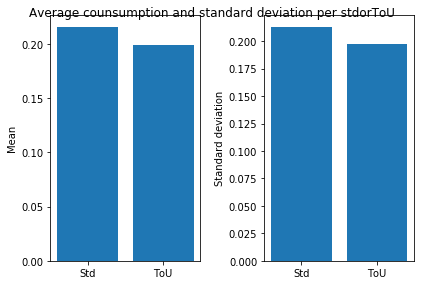

In [21]:
plt.subplot(1, 2, 1)
plt.suptitle('Average counsumption and standard deviation per stdorToU')

plt.bar(by_stdorToU.index, by_stdorToU.overall_mean)
plt.ylabel('Mean')

plt.subplot(1, 2, 2)
plt.bar(by_stdorToU.index, by_stdorToU.overall_std)
plt.ylabel('Standard deviation')

plt.tight_layout()
plt.show()

- nema ozbiljne razlike u prosjecnoj potrosnji izmedju dva tip placanja
- AS i STD se ne razlikuju izmedju ove dvije grupe

### generalna distribucija prosjecne potrosnje i standardne devijacije

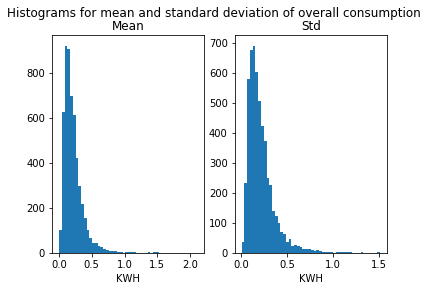

In [22]:
plt.subplot(1,2,1)
plt.suptitle('Histograms for mean and standard deviation of overall consumption')

plt.hist(data_joined.overall_mean, bins=50)
plt.title('Mean')
plt.xlabel('KWH')

plt.subplot(1,2,2)
plt.hist(data_joined.overall_std, bins=50)
plt.title('Std')
plt.xlabel('KWH')
plt.show()

- zakrivljene distiribucije i slicne, veliki broj domacistava trosi slicno

### prosjecna potrosnja i standardna devijacija prema acorn tipovima i grupoma

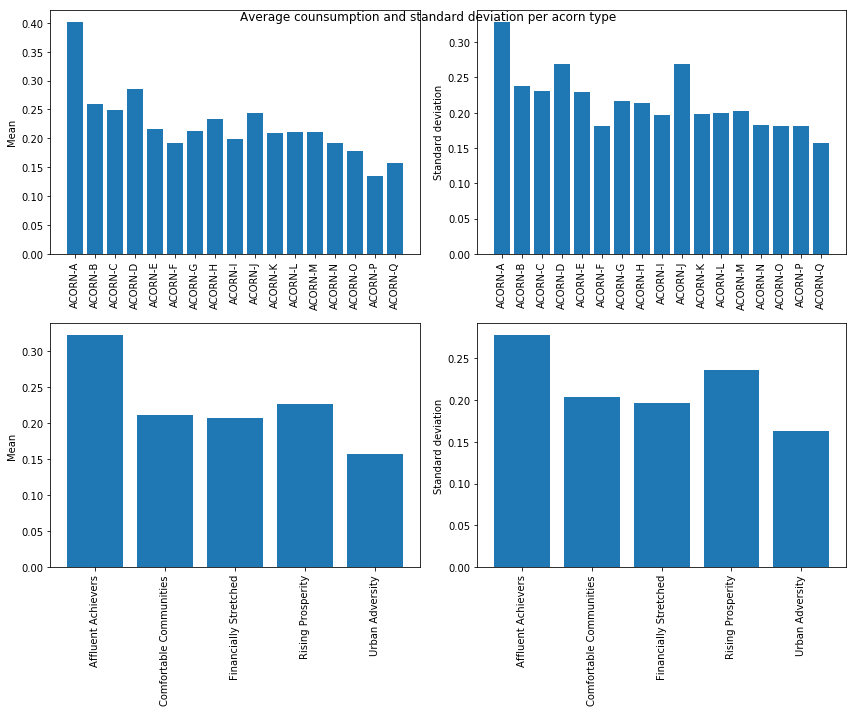

In [23]:
plt.figure(1, figsize=(12,10))
plt.subplot(2, 2, 1)
plt.suptitle('Average counsumption and standard deviation per acorn type')

plt.bar(by_acorn_type.index, by_acorn_type.overall_mean)
plt.ylabel('Mean')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
plt.bar(by_acorn_type.index, by_acorn_type.overall_std)
plt.ylabel('Standard deviation')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
plt.bar(by_acorn_group.index, by_acorn_group.overall_mean)
plt.ylabel('Mean')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
plt.bar(by_acorn_group.index, by_acorn_group.overall_std)
plt.ylabel('Standard deviation')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Text(0.5,1,'Scatter plot for average consumtiion against standard deviation by acorn groups')

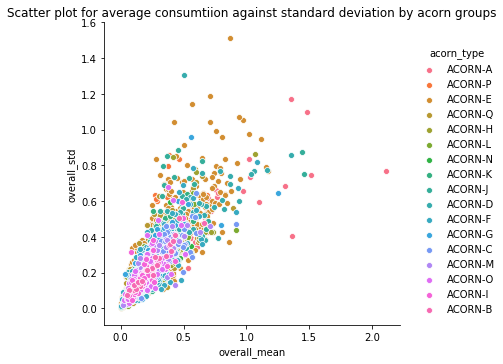

In [127]:
sns.pairplot(x_vars=['overall_mean'], y_vars=['overall_std'], data=data_joined, hue='acorn_type', height=5)
plt.title('Scatter plot for average consumtiion against standard deviation by acorn types')

Text(0.5,1,'Scatter plot for average consumtiion against standard deviation by acorn types')

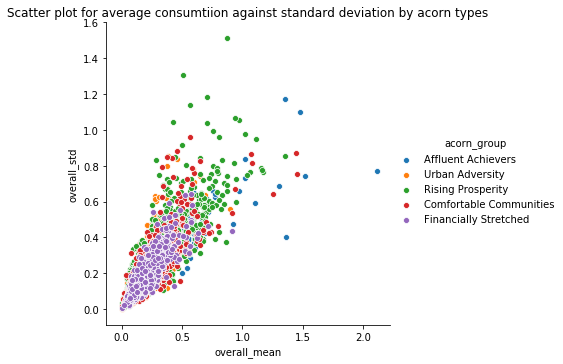

In [128]:
sns.pairplot(x_vars=['overall_mean'], y_vars=['overall_std'], data=data_joined, hue='acorn_group', height=5)
plt.title('Scatter plot for average consumtiion against standard deviation by acorn types')

- **napomena** Rising Prosperity je druga grupa po redu, nisam uspijeo da je na brzinu sortiram da bude i drugi bar
- Acorn tip A ubjedljivo najvise trose
- Affluent Achievers imaju visu potrosnju zbog acorn tipa A
- Acorn grupe Rising Prosperity, Comfortable Communities, Financially Stretched veoma ujednaceno trose
- Za Affluent Achievers i Rising Prosperity vidi se visa STD, jer Acorn tip A za Affluent Achievers i tip D za Rising Prosperity, dosta odstupaju od drugih tipova u ovim grupama
- izgleda kao da bi se acorn tip A prema potrosnji mogao svrstati u Affluent Achievers

### Distirbucije prosjecne potrosnje prema acorn grupama

C:\Users\mneskovic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distributions of average consumption per acron group')

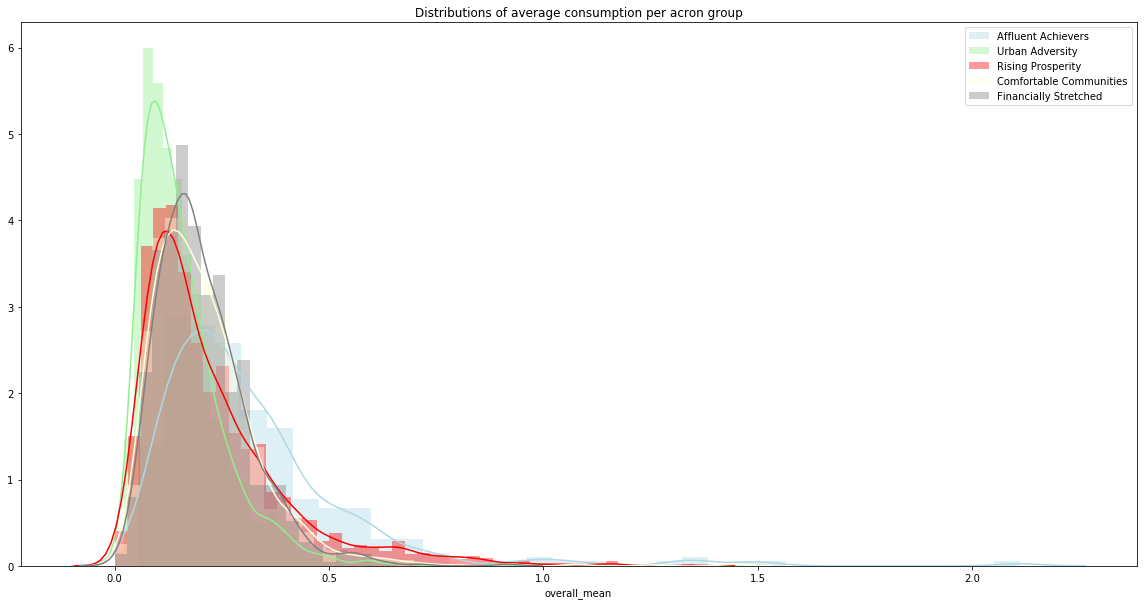

In [129]:
plt.figure(1, figsize=(20,10))
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Affluent Achievers', 'overall_mean'], label='Affluent Achievers', color="lightblue", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Urban Adversity', 'overall_mean'], label='Urban Adversity', color="lightgreen", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Rising Prosperity', 'overall_mean'], label='Rising Prosperity', color="red", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Comfortable Communities', 'overall_mean'], label='Comfortable Communities', color="lightyellow", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Financially Stretched', 'overall_mean'], label='Financially Stretched', color="gray", norm_hist=True) #hist=False)
plt.legend()
plt.title('Distributions of average consumption per acron group')

- prema Acorn grupama i tipovima mogu se razaznati samo oni koji prilicno vise trose i oni koji prlicno manje trose, odnosno mogu se izdvojiti po potrosnji oni koji su vise imucni i manje imucni


### Da li postoje razlike po grupama i tipovima za periode dana

(0, 0.6)

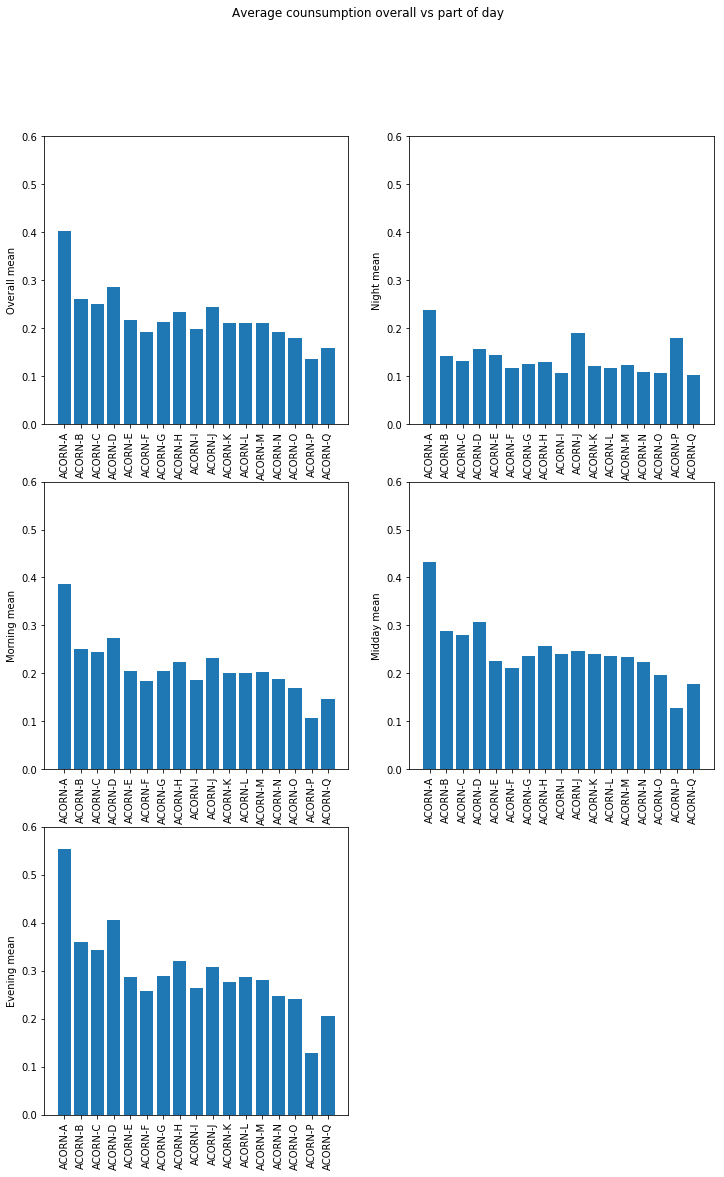

In [27]:
plt.figure(1, figsize=(12,18))
plt.suptitle('Average counsumption overall vs part of day')

ymin=0
ymax=0.6

plt.subplot(3, 2, 1)
plt.bar(by_acorn_type.index, by_acorn_type.overall_mean)
plt.ylabel('Overall mean')
plt.xticks(rotation=90)
plt.ylim([ymin, ymax])

plt.subplot(3, 2, 2)
plt.bar(by_acorn_type.index, by_acorn_type.night_mean)
plt.ylabel('Night mean')
plt.xticks(rotation=90)
plt.ylim([ymin, ymax])

plt.subplot(3, 2, 3)
plt.bar(by_acorn_type.index, by_acorn_type.morning_mean)
plt.ylabel('Morning mean')
plt.xticks(rotation=90)
plt.ylim([ymin, ymax])

plt.subplot(3, 2, 4)
plt.bar(by_acorn_type.index, by_acorn_type.midday_mean)
plt.ylabel('Midday mean')
plt.xticks(rotation=90)
plt.ylim([ymin, ymax])

plt.subplot(3, 2, 5)
plt.bar(by_acorn_type.index, by_acorn_type.evening_mean)
plt.ylabel('Evening mean')
plt.xticks(rotation=90)
plt.ylim([ymin, ymax])

- Acorn tipovi J i P imaju karakteristicno vecu potrosnju nocu
- veca potrosnja posljepodne i uvece

C:\Users\mneskovic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Average consumption')

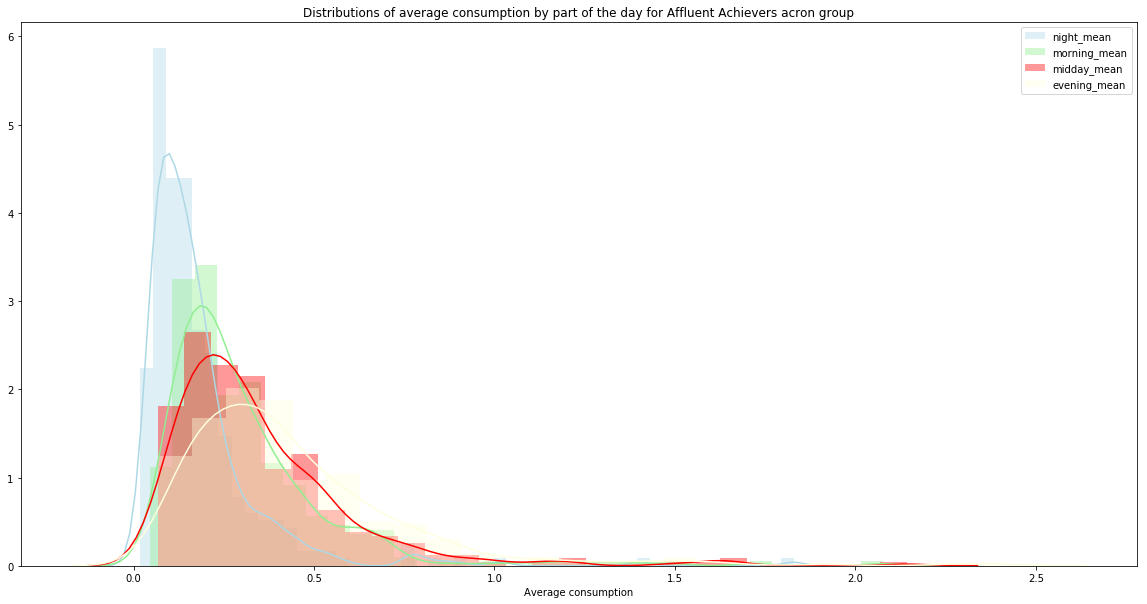

In [130]:
plt.figure(1, figsize=(20,10))
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Affluent Achievers', 'night_mean'], label='night_mean', color="lightblue", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Affluent Achievers', 'morning_mean'], label='morning_mean', color="lightgreen", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Affluent Achievers', 'midday_mean'], label='midday_mean', color="red", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Affluent Achievers', 'evening_mean'], label='evening_mean', color="lightyellow", norm_hist=True) #hist=False)
plt.legend()
plt.title('Distributions of average consumption by part of the day for Affluent Achievers acron group')
plt.xlabel('Average consumption')

C:\Users\mneskovic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distributions of average consumption in the evening per acron groups')

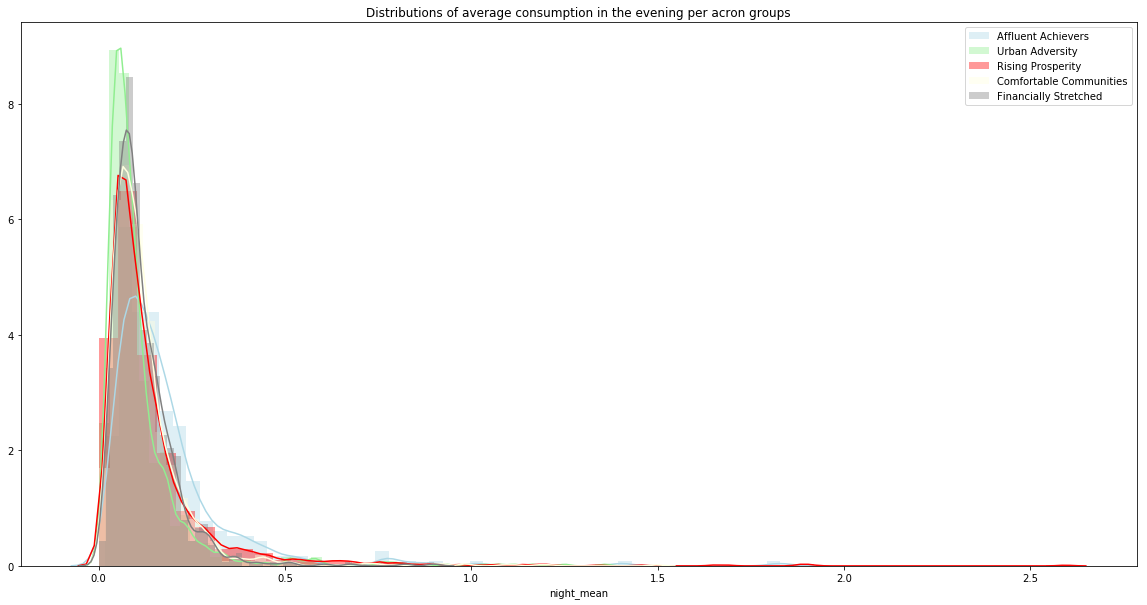

In [131]:
plt.figure(1, figsize=(20,10))
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Affluent Achievers', 'night_mean'], label='Affluent Achievers', color="lightblue", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Urban Adversity', 'night_mean'], label='Urban Adversity', color="lightgreen", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Rising Prosperity', 'night_mean'], label='Rising Prosperity', color="red", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Comfortable Communities', 'night_mean'], label='Comfortable Communities', color="lightyellow", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Financially Stretched', 'night_mean'], label='Financially Stretched', color="gray", norm_hist=True) #hist=False)
plt.legend()
plt.title('Distributions of average consumption in the night per acron groups')

C:\Users\mneskovic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distributions of average consumption in the evening per acron groups')

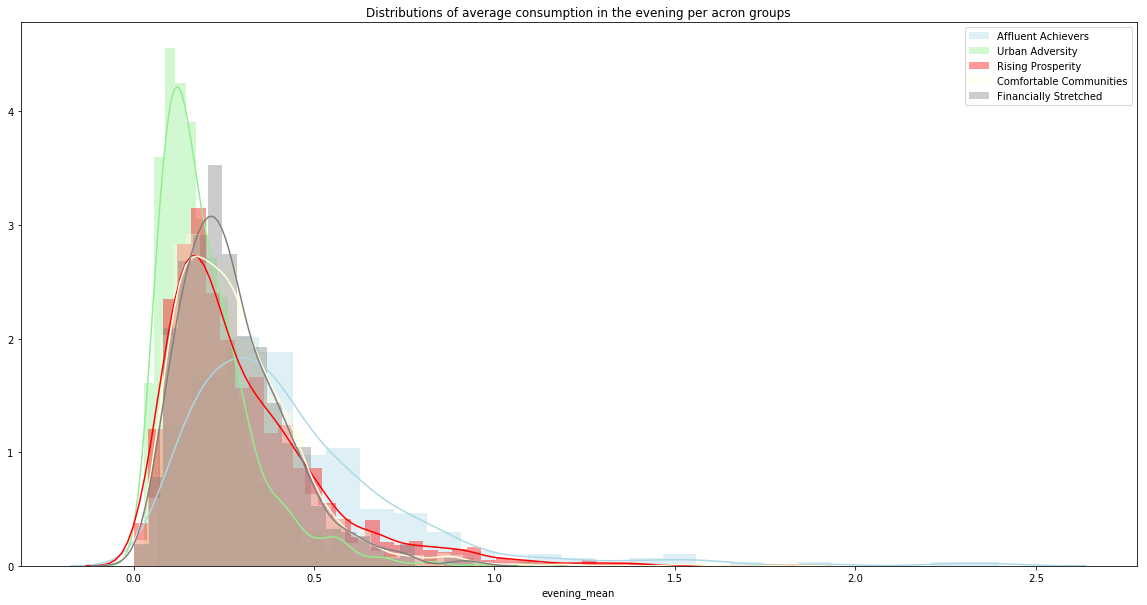

In [132]:
plt.figure(1, figsize=(20,10))
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Affluent Achievers', 'evening_mean'], label='Affluent Achievers', color="lightblue", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Urban Adversity', 'evening_mean'], label='Urban Adversity', color="lightgreen", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Rising Prosperity', 'evening_mean'], label='Rising Prosperity', color="red", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Comfortable Communities', 'evening_mean'], label='Comfortable Communities', color="lightyellow", norm_hist=True) #hist=False)
sns.distplot(data_joined.loc[data_joined['acorn_group']=='Financially Stretched', 'evening_mean'], label='Financially Stretched', color="gray", norm_hist=True) #hist=False)
plt.legend()
plt.title('Distributions of average consumption in the evening per acron groups')

- Acorn grupe se uveliko preklapaju za sve tipove dana (ostavio sam samo neke vizualizacije)
- jedini zaklucak po tipu dana je da acorn tip J i P imaju uvecana potrosnja nocu, i da se generalno trosi vise posljepodne i uvece

### Da li postoji razlika u potrosnji izmedju ACORN grupa i tipova prema radnom danu

C:\Users\mneskovic\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Average consumption KWH')

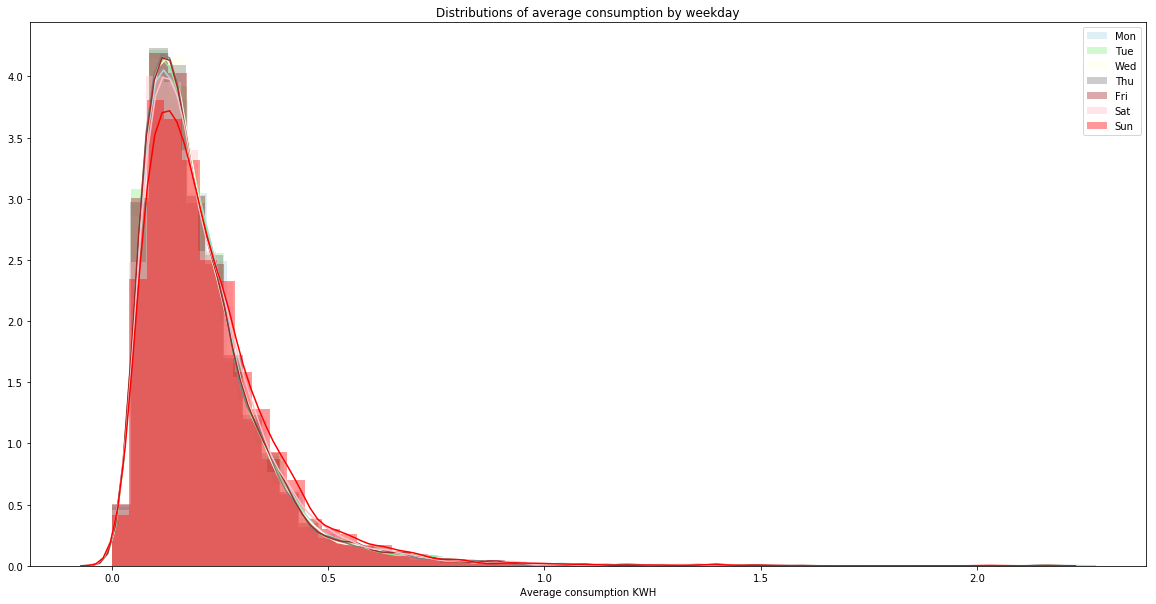

In [134]:
plt.figure(1, figsize=(20,10))
sns.distplot(data_joined['0_mean'], label='Mon', color="lightblue", norm_hist=True)
sns.distplot(data_joined['1_mean'], label='Tue', color="lightgreen", norm_hist=True)
sns.distplot(data_joined['2_mean'], label='Wed', color="lightyellow", norm_hist=True)
sns.distplot(data_joined['3_mean'], label='Thu', color="gray", norm_hist=True)
sns.distplot(data_joined['4_mean'], label='Fri', color="brown", norm_hist=True)
sns.distplot(data_joined['5_mean'], label='Sat', color="pink", norm_hist=True)
sns.distplot(data_joined['6_mean'], label='Sun', color="red", norm_hist=True)
plt.legend()
plt.title('Distributions of average consumption by weekday')
plt.xlabel('Average consumption KWH')

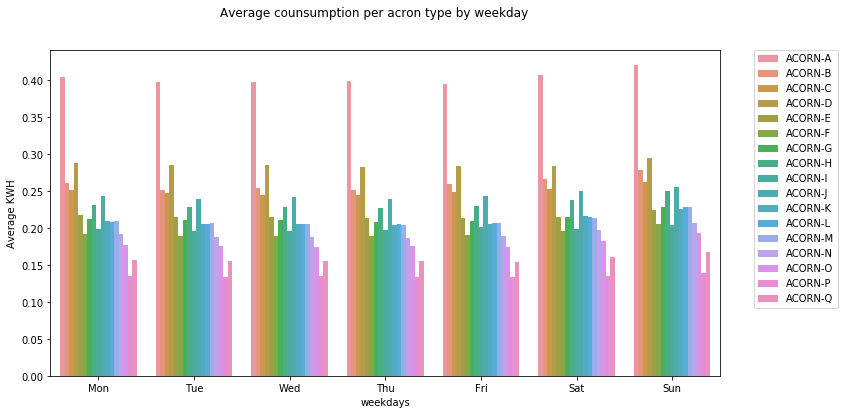

In [118]:
plt.figure(1, figsize=(12,6))
plt.suptitle('Average counsumption per acron type by weekday')

g = sns.barplot(x='variable', y='value', hue='acorn_type',
                data=by_acorn_type.filter(regex='^[0-9]_mean').reset_index().melt(id_vars='acorn_type'))
plt.ylabel('Average KWH')
plt.xlabel('weekdays')
g.set_xticklabels(labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

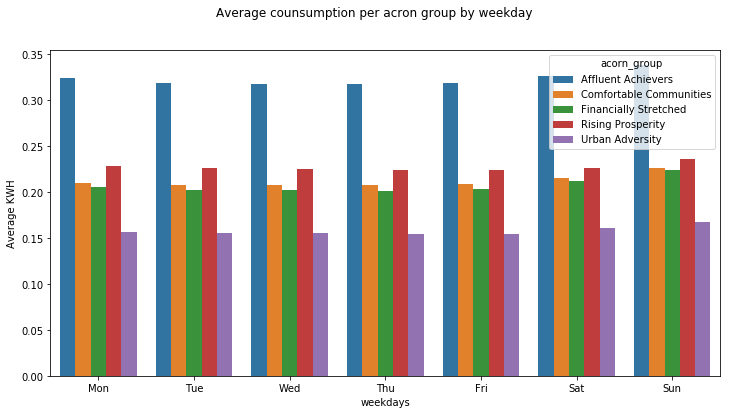

In [114]:
plt.figure(1, figsize=(12,6))
plt.suptitle('Average counsumption per acron group by weekday')

g = sns.barplot(x='variable', y='value', hue='acorn_group',
                data=by_acorn_group.filter(regex='^[0-9]_mean').reset_index().melt(id_vars='acorn_group'))
plt.ylabel('Average KWH')
plt.xlabel('weekdays')
g.set_xticklabels(labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
g

- ujednacena potrosnja prema danima u sedmici prema grupama
- ujednacena do tog nivoa da imam osjecaj da nesto nisam dobro uradio

### Da li postoji razlika u potrosnji prema mjesecima i sedmicama

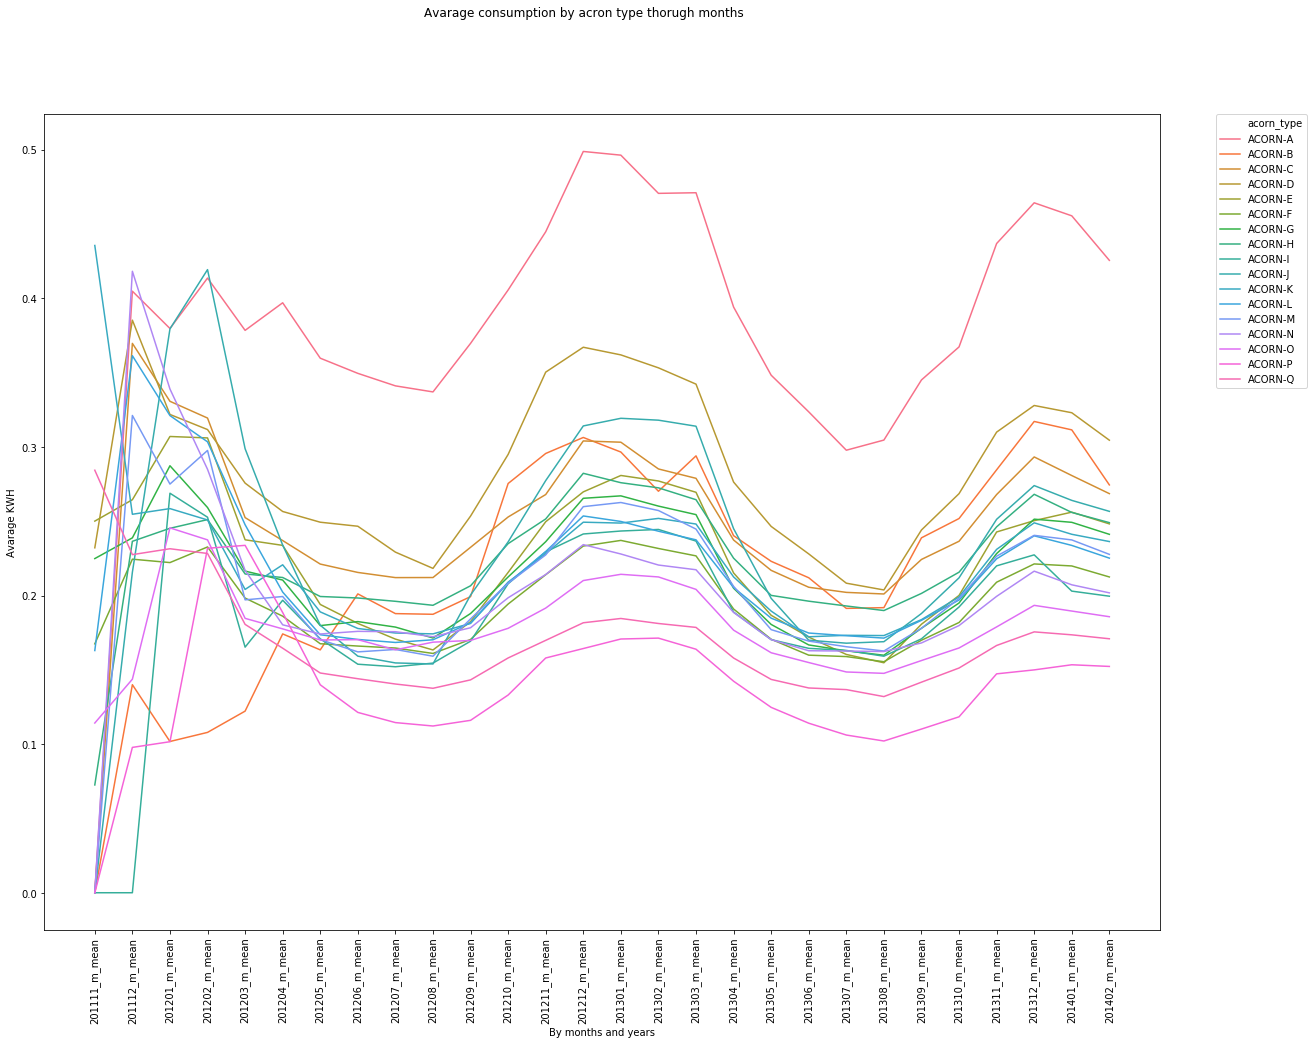

In [135]:
plt.figure(1, figsize=(20,15))
plt.suptitle('Avarage consumption by acron type thorugh months')
g = sns.lineplot(x='variable', y="value", hue='acorn_type',
             data=by_acorn_type.filter(regex='^[0-9].*m_mean$').reset_index().melt(id_vars='acorn_type').fillna(0),
            ci=False)
plt.xlabel('By months and years')
plt.ylabel('Avarage KWH')
plt.xticks(rotation=90)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g

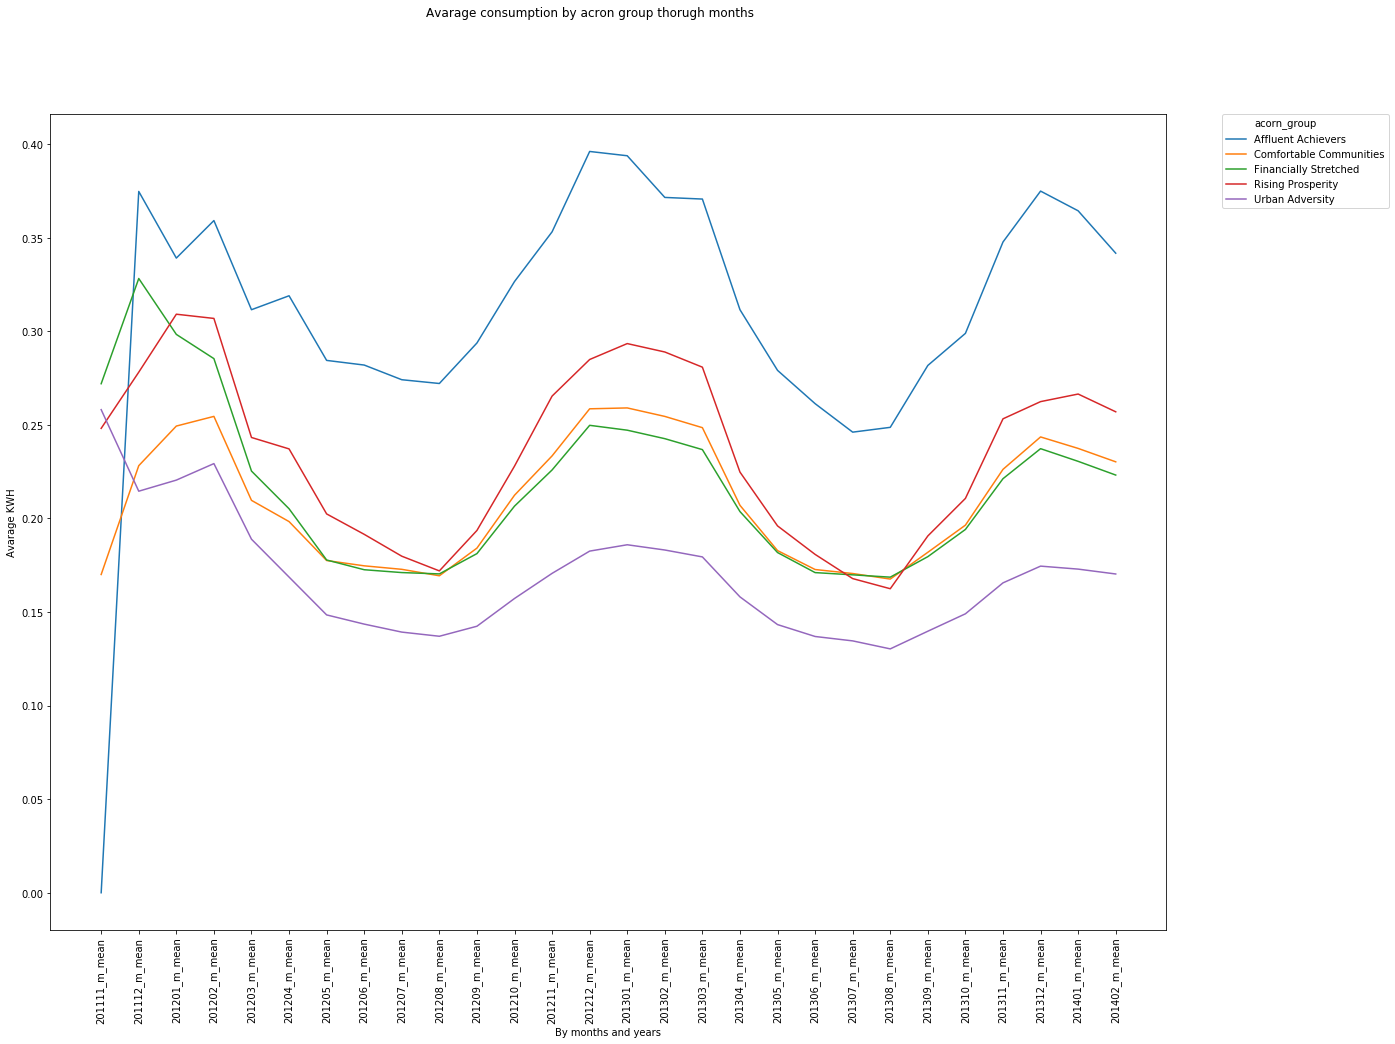

In [136]:
plt.figure(1, figsize=(20,15))
plt.suptitle('Avarage consumption by acron group thorugh months')
g = sns.lineplot(x='variable', y="value", hue='acorn_group',
             data=by_acorn_group.filter(regex='^[0-9].*m_mean$').reset_index().melt(id_vars='acorn_group').fillna(0),
             ci=False)
plt.xlabel('By months and years')
plt.ylabel('Avarage KWH')
plt.xticks(rotation=90)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g

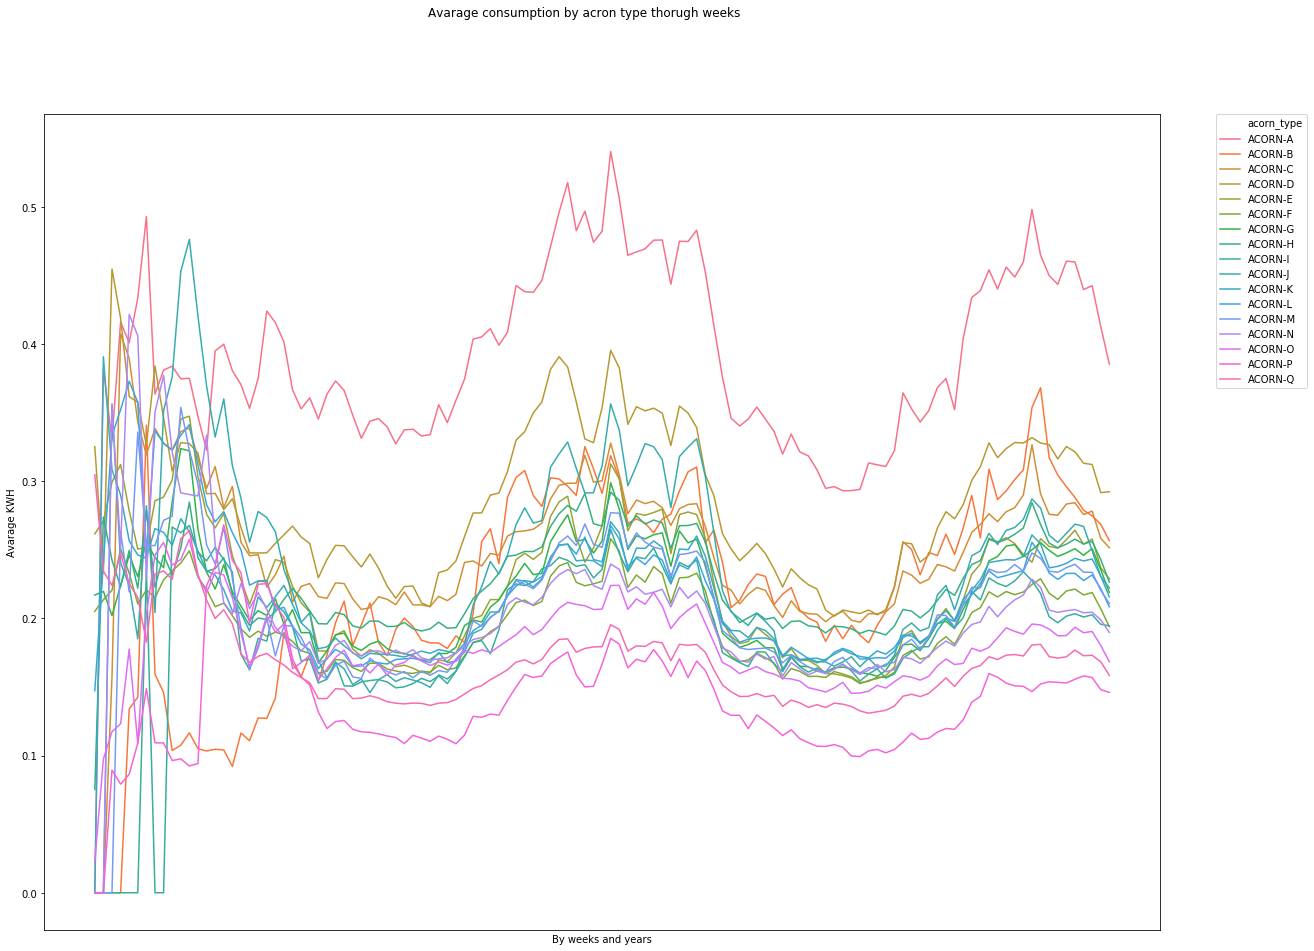

In [138]:
plt.figure(1, figsize=(20,15))
plt.suptitle('Avarage consumption by acron type thorugh weeks')
g = sns.lineplot(x='variable', y="value", hue='acorn_type',
             data=by_acorn_type.filter(regex='^[0-9].*w_mean$').reset_index().melt(id_vars='acorn_type').fillna(0),
            ci=False)
plt.xlabel('By weeks and years')
plt.ylabel('Avarage KWH')
plt.xticks([])
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g

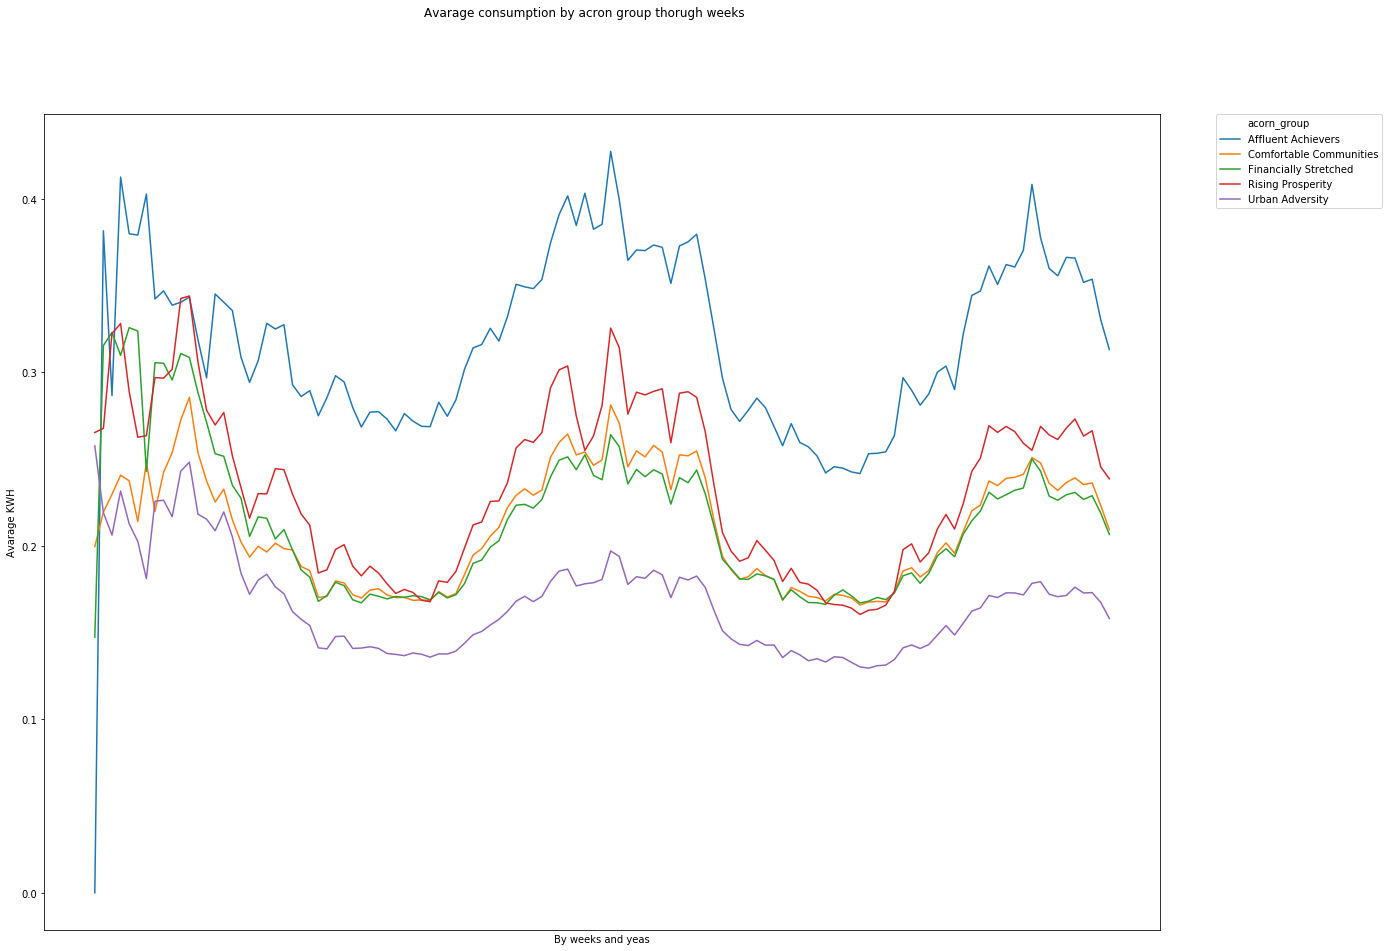

In [139]:
plt.figure(1, figsize=(20,15))
plt.suptitle('Avarage consumption by acron group thorugh weeks')
g = sns.lineplot(x='variable', y="value", hue='acorn_group',
             data=by_acorn_group.filter(regex='^[0-9].*w_mean$').reset_index().melt(id_vars='acorn_group').fillna(0),
             ci=False)
plt.xlabel('By weeks and yeas')
plt.ylabel('Avarage KWH')
plt.xticks([])
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
g

- Vidi se cist sezonski efekat na potrosnju (necu praviti vizualizacije za sesonu)
- Ne postoje velika ostupanja izmedju acron grupa kroz vremen
- Odstupanja postoje unutar tipova za neke periode, ali nista veliko

### Kratak rezime

- Prema grupama i tipovima potrosaca postoje suptilne razlike u potrosnji koje se uglavnom javljaju na ukrstenim nivoima. Najociglednije je da sto je platezno mocnija grupa to je i veci potrosac. Razlike postoje na tipovima koji su prelazni, ali samo u dvije najimucnije grupe.
- Sto se tice dijela dana, postoje razlike gdje se najvise trosi posljepodne i uvece. Takodje, postoje razlike za acorn tip J i P kojima prosjecna potrosnja nocu odskace od ostalih tipova.
- Neocekivano ne postoji razlika prema danu u sedmici prema potrosnji, sve group podjednako trose energiju za sve dane.
- Ocekivano postoji jasan sezonski efekat, rast prosjecne potrosnje zimi, pad ljeti.

### Komentari
- Na pocetku sam provjeravao vise agregiranih varijabli, ali sam ih se odrekao i koristio samo AS i STD, jer sam smatrao da su najbolje za prikazivanje razlika i bilo je previse da ih sve pokusavam.
- Pokusao sam da plotujem mnogo vise stvari, ali od velikog broja mogucnosti negdje sam se preplavio. U kome smijeru bi ti krenuo da dodatno istrazujes?
- Ja bih dalje probao da plotujem dnevne agregacije i da vidim kako se svako domacinstvo ponasa, da iskoristim dodatne acron varijable kao sto je broj ukucana, djece i slicno.
- Nisam ukljucio vremenske podatke, to mogu dodati ubrzo, jedino ne vidim sta bi moglo osim temperature i vlaznosti da utice na potrosnju energije. Da li imas neku ideju?


- Ovo mi je bio najtezi deo za izvodjenje, jer sam najmanje radio vizualizacije u pythonu i stalno sam se vracao da ispravljam stvari koje sam predvidjeo. Imam ideju sta zelim da prikazem, ali mi treba vremena dok dodjem do toga. Dobra je stvar sto se upoznajem sa seaborn bibliotekom, koju nisam vise radio do sada.